## Import Libraries

In [3]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

## Load the Data

In [4]:
df = pd.read_csv(r"C:\Users\labbo\OneDrive\Desktop\BootTuwaiq\week3\Usecase-7\dataSet\cleaned_data_football.csv")

In [5]:
df.shape

(10754, 19)

In [6]:
df.head(2)

,Unnamed: 0,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,0,Manchester United,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000
1,1,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [7]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]
df = df.drop('Unnamed: 0', axis=1)


In [58]:
# Completeness
df.isnull().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

In [59]:
# Accurecy types
df.dtypes

Type            object
Region          object
Make            object
Gear_Type       object
Origin          object
Options         object
Year             int64
Engine_Size    float64
Mileage          int64
Negotiable        bool
Price            int64
dtype: object

In [8]:
categorical_features = ['team', 'position']
numeric_features = ['highest_value', 'current_value', 'games_injured',
'days_injured','minutes played','clean sheets','goals conceded',
'red cards','second yellow cards','yellow cards','assists','goals','appearance','age','height']

In [9]:
for i in categorical_features:
    print (df[i].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64


#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [10]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000
1,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000


In [11]:
df.shape

(10754, 18)

In [12]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000
1,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000


#### 3. Feature selection

In [13]:
df = df[['appearance', 'minutes played', 'games_injured']]

In [14]:
df.head(2)

,appearance,minutes played,games_injured
0,104,9390,5
1,15,1304,58


#### 4. Prepare train and test data

In [15]:
# Prepare data
X = df


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X.shape


(10754, 3)

## Buliding the Model

In [17]:
wcss = []
for i in range(1, 20):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS


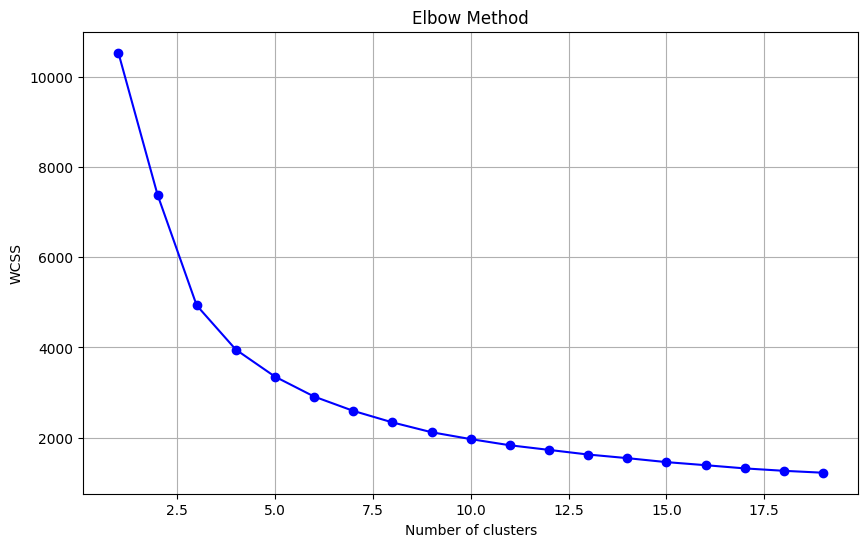

In [82]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [18]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 3 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

## Train and Test the Model

In [19]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

## Evaluating the Model 

In [20]:
X.head(2)

,appearance,minutes played,games_injured
0,104,9390,5
1,15,1304,58


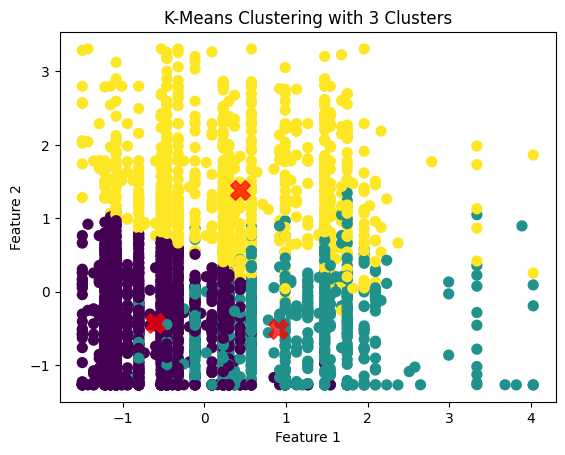

In [86]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [21]:
X['kmeans'] = y_pred

In [22]:
X['kmeans'].value_counts()

kmeans
0    5240
1    4130
2    1384
Name: count, dtype: int64

In [23]:
X[X['kmeans']==0]

,appearance,minutes played,games_injured,kmeans
8,34,2758,13,0
11,34,2686,28,0
20,39,2788,0,0
28,34,1030,15,0
29,24,1700,12,0
...,...,...,...,...
10749,16,1023,0,0
10750,26,1449,18,0
10751,20,960,0,0
10752,17,865,0,0


<Axes: xlabel='appearance', ylabel='minutes played'>

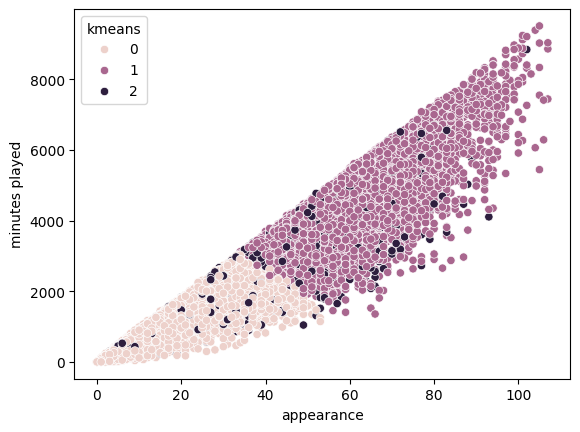

In [25]:
sns.scatterplot(data = X , x = 'appearance', y = 'minutes played', hue = 'kmeans')

<Axes: xlabel='minutes played', ylabel='games_injured'>

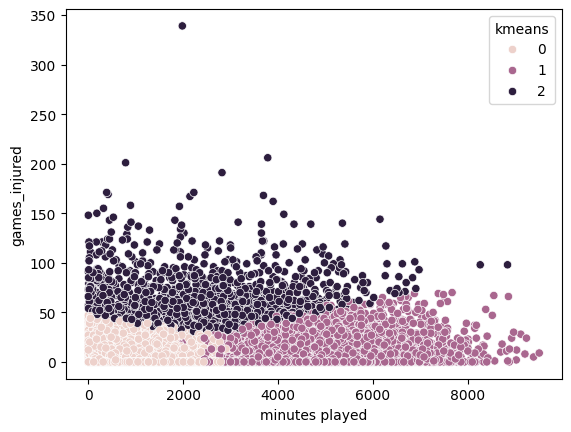

In [26]:
sns.scatterplot(data = X , x = 'minutes played', y = 'games_injured', hue = 'kmeans')

In [27]:

import plotly
import plotly.express as px

fig = px.scatter_3d(X, x='games_injured', y='minutes played', z='appearance',
              color='kmeans')
fig.show()

In [ ]:
#Thank you 